In [1]:
import sys
import random
import numpy as np
import pandas as pd
import numpy as np
import json
import tyssue
from pprint import pprint
import matplotlib.pylab as plt
%matplotlib inline
import ipyvolume as ipv
from matplotlib import pyplot
from tyssue.solvers import QSSolver

import logging


from IPython.display import Image


from tyssue.topology import add_vert

import tyssue.dynamics as tydyn
from tyssue import config, Sheet, SheetGeometry, History, EventManager, PlanarGeometry
from tyssue import SheetGeometry as geom
from tyssue import PlanarGeometry as geom
from tyssue.draw.plt_draw import create_gif
from tyssue.draw.plt_draw import plot_forces
from tyssue.draw import sheet_view
from tyssue.dynamics import effectors, model_factory
from tyssue.dynamics import PlanarModel
from tyssue.dynamics import SheetModel as model
from tyssue.generation import three_faces_sheet
from tyssue.solvers.viscous import EulerSolver
from tyssue.solvers.quasistatic import QSSolver
from tyssue.draw import sheet_view
from tyssue.draw.plt_draw import plot_forces
from tyssue.io import hdf5
import copy

from tyssue.geometry.planar_geometry import PlanarGeometry as geom
from tyssue.solvers.quasistatic import QSSolver
from tyssue.dynamics.planar_vertex_model import PlanarModel as model


from tyssue.stores import load_datasets

from tyssue.topology.sheet_topology import remove_face, cell_division

import warnings
warnings.filterwarnings('ignore')

### T1 transitions

from tyssue.topology.sheet_topology import type1_transition
from tyssue.topology.base_topology import collapse_edge, remove_face
from tyssue.topology.sheet_topology import split_vert as sheet_split
from tyssue.topology.bulk_topology import split_vert as bulk_split
from tyssue.topology import condition_4i, condition_4ii

collision solver could not be imported You may need to install CGAL and re-install tyssue
C++ extension are not available for this version


Reseting column is_active of the vert dataset with new specs


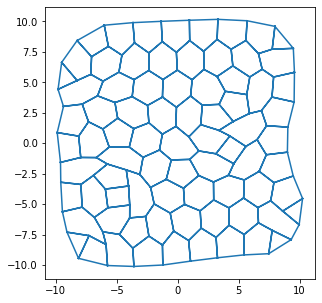

In [2]:
sheet = Sheet.planar_sheet_2d('flat', 20, 20, 1, 1, noise = 0.2)
geom = PlanarGeometry

to_cut = sheet.cut_out([(0.1, 10), (0.1, 10)])
sheet.remove(to_cut, trim_borders=True)
sheet.sanitize(trim_borders=True)
geom.center(sheet)
geom.update_all(sheet)
sheet.update_rank()
model = model_factory(
    [
        effectors.LengthElasticity,
        effectors.FaceAreaElasticity
    ]
)

specs = {
    "face": {
        
        "prefered_area": 6,
        "area_elasticity": 5e-1
    },
    "edge": {
        "length_elasticity": 1,
        "prefered_length":1,
        "is_active": 1
    },
    "vert": {
        "is_active": 1
    },
}

sheet.update_specs(specs, reset=True)

solver = QSSolver()

res = solver.find_energy_min(sheet, geom, model)

fig, ax = sheet_view(sheet, mode="quick")
fig.set_size_inches(5, 5)


In [ ]:
sheet.edge_df

In [ ]:
draw_specs = tyssue.config.draw.sheet_spec()

draw_specs['edge']['color'] = "blue"

draw_specs['edge']['alpha'] = 0.5
draw_specs['edge']['s'] = 500
sheet.edge_df['colour'].loc[0] = "red"

coords = ['x', 'y']
fig, ax = sheet_view(sheet, coords, **draw_specs)

In [ ]:
sheet.edge_df['colour'] = "blue"

for edge in range(len(sheet.edge_df)):
    currentEdge = sheet.edge_df.loc[edge]
    if currentEdge['length']>0.1:
        currentEdge['colour'] = "red"
    sheet.edge_df.loc[edge] = currentEdge;

coords = ['x', 'y']
draw_specs = {
    'vert': {
        'visible': False
        },
    'edge': {
        'color': sheet.edge_df,
        #'zorder': depth.values
        }
    }
color = sheet.edge_df['length']
pprint(draw_specs)
ipv.clear()

fig, ax = sheet_view(sheet, coords, **draw_specs)

In [ ]:
draw_specs = config.draw.sheet_spec()
draw_specs['face']['visible'] = True

#draw_specs['face']['visible'] = False
draw_specs['face']['color'] = np.random.random(sheet.face_df.shape[0])

draw_specs['face']['alpha'] = 0.5

ipv.clear()
fig2, mesh = sheet_view(sheet, mode="2D", **draw_specs)
fig2

In [ ]:
to_cut = sheet.cut_out([(-6, 6), (-5, 7)])
sheet.remove(to_cut, trim_borders=True)
draw_specs['edge']['width'] = 1
color = sheet.edge_df['length']
color[color<0] = 0;
ipv.clear()
fig2, mesh = sheet_view(sheet, edge={"color":color, "width":1.5}, mode="2D")
fig2.set_size_inches(15, 15)
plt.savefig('length_colour.png')

In [ ]:
sheet.edge_df

In [ ]:
sheet.edge_df['colour'].loc[0,1,2,3] = "red"
colour = sheet.edge_df['colour']

In [ ]:
draw_specs['edge']['color'] = colour

In [ ]:
fig, ax = sheet_view(sheet, coords, **draw_specs)

In [ ]:
#draw_specs['edge']['width'] = 2

#ong_edges = sheet.edge_df[sheet.edge_df['length'] > 0.9]


draw_specs['edge']['color'] = "blue"

for edge in range(len(sheet.edge_df)):
    currentEdge = sheet.edge_df.loc[edge]
    if currentEdge['length']>0.9:
        draw_specs['edge']['color'] = "red"
    


        
fig, ax = sheet_view(sheet, coords, **draw_specs)



# its changing all edges to red if it finds an edge that's > 0.9


#draw_specs['face']['color'] = "red"
#coords = ['x', 'y']


In [ ]:
draw_specs = tyssue.config.draw.sheet_spec()
edge_color = np.linspace(0.0, 1.0, 
                        num=sheet.edge_df.shape[0])
coords = ['x', 'y']
draw_specs['edge']['color'] = edge_color

fig, ax = sheet_view(sheet, coords, **draw_specs)
fig.set_size_inches(10, 10)

In [ ]:
longer_edges = sheet.edge_df['length']>0.5 
draw_specs[longer_edges]['color'] = "red"

In [ ]:
cellmap = Sheet.planar_sheet_2d('cellmap', 30, 30, 1, 1, noise=0.2)
geom = PlanarGeometry

to_cut = cellmap.cut_out([(0.1, 10), (0.1, 10)])
cellmap.remove(to_cut, trim_borders=True)
cellmap.sanitize(trim_borders=True)
geom.center(cellmap)
geom.update_all(cellmap)
cellmap.update_rank()
model = model_factory(
    [
        effectors.LengthElasticity,
        effectors.FaceAreaElasticity
    ]
)

In [ ]:
# Define the parameter space to explore

def phase_diagram(x, y, z, h, n_vals):
        
    #define ranges of investigated parameters
    
    prefered_area_values = np.linspace(x, y, n_vals)
    length_elasticity_values = np.linspace(z, h, n_vals)

    # Simulate the tyssue model for each parameter set
    
    parameter_of_interest_values = np.zeros((n_vals, n_vals))
    
    for i, prefered_area in enumerate(prefered_area_values):
        print('prefered_area =')
        print(prefered_area)
        
        for j, length_elasticity in enumerate(length_elasticity_values):
            print('length_elasticity =')
            print(length_elasticity)
            cellmap_original = Sheet.planar_sheet_2d('cellmap_original', 10, 10, 1, 1,  noise = 0.2)
            geom_original  = PlanarGeometry
            model = model_factory([effectors.LengthElasticity,effectors.FaceAreaElasticity])
            #to_cut = cellmap_original.cut_out([(0.01, 10), (0.01, 10)])
            #cellmap_original.remove(to_cut, trim_borders=True)
            geom_original.center(cellmap_original)
            geom_original.update_all(cellmap_original)
            cellmap_original.update_rank()
            
            #cellmap_original.vert_df["viscosity"] = 1  
            cellmap = cellmap_original
            geom = geom_original
            
            specs = {
                "face": {"prefered_area": prefered_area, "area_elasticity": 0.5
                        },
                "edge": {"length_elasticity": length_elasticity, "prefered_length": 1, "is_active": 1
                        }, 
                "vert": {"is_active": 1
                        },
            }
            
              
            cellmap.update_specs(specs, reset=True)
            
            solver = QSSolver()
            res = solver.find_energy_min(cellmap, geom, model)
            
            #fig.set_size_inches(20, 20)
            #for f, (x, y) in cellmap.face_df[["x", "y"]].iterrows():
                #ax.text(x, y, f)
            
            parameter_of_interest = cellmap.face_df['area'].mean()
            
            print('mean area = ')
            print(parameter_of_interest)
            fig, ax = sheet_view(cellmap, mode="quick")
            parameter_of_interest_values[j,i] = parameter_of_interest
            #print(parameter_of_interest_values)
    
            
    print(parameter_of_interest_values)
    
    # Visualize the phase diagram
    
    fig, ax = plt.subplots()
    im = ax.imshow(parameter_of_interest_values, cmap='coolwarm',
                   extent=[prefered_area_values.min(), prefered_area_values.max(), length_elasticity_values.max(), length_elasticity_values.min()],
                   aspect='auto')
    ax.invert_yaxis()
    ax.set_xlabel('Prefered area')
    ax.set_ylabel('Length elasticity')
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label('Area')

    #plt.savefig('heatmap.png')
    
    plt.show()
    
    return parameter_of_interest_values
    

In [ ]:
phase_diagram(5, 15, 0.001, 2, 5)

In [ ]:
# Define the parameter space to explore

def phase_diagram(x, y, z, h, n_vals):
        
    #define ranges of investigated parameters
    
    prefered_area_values = np.linspace(x, y, n_vals)
    prefered_length_values = np.linspace(z, h, n_vals)

    # Simulate the tyssue model for each parameter set
    
    parameter_of_interest_values = np.zeros((n_vals, n_vals))
    
    for i, prefered_area in enumerate(prefered_area_values):
        print('prefered_area =')
        print(prefered_area)              
            
        for j, prefered_length in enumerate(prefered_length_values):
            print('prefered_length =')
            print(prefered_length)
            cellmap_original = Sheet.planar_sheet_2d('cellmap_original', 10, 10, 1, 1,  noise = 0.2)
            geom_original  = PlanarGeometry
            model = model_factory([effectors.LengthElasticity,effectors.FaceAreaElasticity])
            #to_cut = cellmap_original.cut_out([(0.1, 6), (0.1, 6)])
            #cellmap_original.remove(to_cut, trim_borders=True)
            #cellmap_original.sanitize(trim_borders=True)
            geom_original.center(cellmap_original)
            geom_original.update_all(cellmap_original)
            cellmap_original.update_rank()
            
            #cellmap_original.vert_df["viscosity"] = 1  
            cellmap = cellmap_original
            geom = geom_original
           
            
            specs = {
                "face": {"prefered_area": prefered_area, "area_elasticity": 1.
                        },
                "edge": {"length_elasticity": 0.5, "prefered_length": prefered_length, "is_active": 1
                        }, 
                "vert": {"is_active": 1
                        },
            }
            
              
            cellmap.update_specs(specs, reset=True)
            
            solver = QSSolver()
            res = solver.find_energy_min(cellmap, geom, model)
            fig, ax = sheet_view(cellmap, mode="quick")
            
            #fig.set_size_inches(20, 20)
            #for f, (x, y) in cellmap.face_df[["x", "y"]].iterrows():
                #ax.text(x, y, f)
            
            parameter_of_interest = cellmap.face_df['area'].mean()
            
            print('mean area = ')
            print(parameter_of_interest)
            parameter_of_interest_values[j,i] = parameter_of_interest
            
            
    print(parameter_of_interest_values)
    # Visualize the phase diagram
    fig, ax = plt.subplots()
    im = ax.imshow(parameter_of_interest_values, cmap='coolwarm',
                   extent=[prefered_area_values.min(), prefered_area_values.max(), prefered_length_values.max(), prefered_length_values.min()],
                   aspect='auto')
    ax.invert_yaxis()
    ax.set_xlabel('Prefered area')
    ax.set_ylabel('Prefered length')
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label('Area')
    
    print(parameter_of_interest_values)
    plt.savefig('heatmap.png')
    
    plt.show()
   
    

In [ ]:
phase_diagram(5, 15, 0.01, 5, 5)

In [ ]:
def length_elasticity_range(cellmap, FRC_lower_length_elasticity, FRC_higher_length_elasticity, ECM_lower_length_elasticity, ECM_higher_length_elasticity):
    
    cellmap.edge_df['length_elasticity_ECM'] = cellmap.edge_df['length_elasticity']
    cellmap.edge_df['length_elasticity_FRC'] = cellmap.edge_df['length_elasticity']
        
    for edge in range(len(cellmap.edge_df)):
        FRC = random.randrange(FRC_lower_length_elasticity, FRC_higher_length_elasticity)/10000
        ECM = random.randrange(ECM_lower_length_elasticity, ECM_higher_length_elasticity)/10000
        cellmap.edge_df['length_elasticity'][edge] = FRC + ECM
        cellmap.edge_df['length_elasticity_ECM'][edge] = ECM
        cellmap.edge_df['length_elasticity_FRC'][edge] = FRC
    return cellmap

In [ ]:
def prefered_area_range(cellmap, lower_prefered_area, higher_prefered_area):
    for face in range(len(cellmap.face_df)):
        newValue = random.randrange(lower_prefered_area, higher_prefered_area)/10000
        cellmap.face_df['prefered_area'][face] = newValue
    return cellmap

In [ ]:
def change_specs(cellmap, geom, model, history, face_elasticity,
                 lower_prefered_area, higher_prefered_area, FRC_lower_length_elasticity, FRC_higher_length_elasticity, ECM_lower_length_elasticity,
                 ECM_higher_length_elasticity, line_nought, endTime):
    
    
    length_elasticity_range(cellmap, FRC_lower_length_elasticity, FRC_higher_length_elasticity, ECM_lower_length_elasticity, ECM_higher_length_elasticity)
    prefered_area_range(cellmap, lower_prefered_area, higher_prefered_area)

    
    cellmap.face_df["face_elasticity"] = face_elasticity
    cellmap.edge_df["prefered_length"] = line_nought


    cellmap.vert_df["viscosity"] = 1   
    
    #cellmap_original.face_df["prefered_area"][0] = 2
    #cellmap_original.face_df["prefered_area"][41] = 2
    
    solver1 = EulerSolver(cellmap, geom, model, history=history, auto_reconnect=True)
    res1 = solver1.solve(tf=endTime, dt=0.05)
    
    cellmap_new = copy.deepcopy(cellmap_original)
    geom_new = copy.deepcopy(geom_original)
    model_new = copy.deepcopy(model_original)
    history_new = copy.deepcopy(history_original)
    
    return [cellmap_new, geom_new, model_new, history_new]
    

In [ ]:
def create_frames(
    history,
    output,
    movie_name,
    num_frames=None,
    interval=None,
    draw_func=None,
    margin=5,
    **draw_kwds,
):
    """Creates a set of png frames of the recorded history.
   
    Parameters
    ----------
    history : a :class:`tyssue.History` object
    output : path to the output directory
    num_frames : int, the number of frames in the gif
    interval : tuples, define begin and end frame of the gif
    draw_func : a drawing function
         this function must take a `sheet` object as first argument
         and return a `fig, ax` pair. Defaults to quick_edge_draw
         (aka sheet_view with quick mode)
    margin : int, the graph margins in percents, default 5
         if margin is -1, let the draw function decide
    **draw_kwds are passed to the drawing function
    """
    if draw_func is None:
        draw_func = sheet_view

    graph_dir = Path(output + '/' + movie_name)
    graph_dir.mkdir(parents=True, exist_ok=True)

    x, y = coords = draw_kwds.get("coords", history.sheet.coords[:2])
    sheet0 = history.retrieve(0)
    bounds = sheet0.vert_df[coords].describe().loc[["min", "max"]]
    delta = (bounds.loc["max"] - bounds.loc["min"]).max()
    margin = delta * margin / 100
    xlim = bounds.loc["min", x] - margin, bounds.loc["max", x] + margin
    ylim = bounds.loc["min", y] - margin, bounds.loc["max", y] + margin

    if interval is None:
        start, stop = None, None
    else:
        start, stop = interval[0], interval[1]

    for i, (t, sheet) in enumerate(history.browse(start, stop, num_frames)):
        try:
            fig, ax = draw_func(sheet, **draw_kwds)
        except Exception as e:
            print("Droped frame {i}")

        if isinstance(ax, plt.Axes) and margin >= 0:
            ax.set(xlim=xlim, ylim=ylim)
        fig.savefig(graph_dir / f"movie_{i:04d}.png")
        plt.close(fig)

In [ ]:
## Definition of the sheet

cellmap_original = Sheet.planar_sheet_3d('cellmap', 20, 30, 1, 1) # This may need to change
geom_original  = PlanarGeometry

#to_cut = cellmap_original.cut_out([(0.1, 6), (0.1, 6)])
#cellmap_original.remove(to_cut, trim_borders=True)
cellmap_original.sanitize(trim_borders=True)
geom.center(cellmap_original)
geom.update_all(cellmap_original)
cellmap_original.update_rank()

model_original = model_factory([    
    effectors.FaceAreaElasticity,
    effectors.LengthElasticity
    ])



history_original = History(cellmap_original,
                           extra_cols={"edge":["dx", "dy"]})

cellmap_original.update_specs(model_original.specs)

fig, ax = sheet_view(cellmap_original, ['y', 'x'], mode='quick')

In [ ]:
specs = {
    "face": {
        
        "prefered_area": 2,
        "area_elasticity": 1.
    },
    "edge": {
        "length_elasticity": 1e-3,
        "prefered_length": 1,
        "is_active": 1
    },
    "vert": {
        "is_active": 1
    },
}

cellmap_original.update_specs(specs, reset=True)

In [ ]:
cellmap_original.face_df

In [ ]:
[cellmap_H, geom_H, model_H, history_H] = change_specs(cellmap_original, geom_original, model_original, history_original, face_elasticity = 5, lower_prefered_area = 10, higher_prefered_area = 10000, 
                                                       FRC_lower_length_elasticity = 10, FRC_higher_length_elasticity = 1000, ECM_lower_length_elasticity = 10, 
                                                       ECM_higher_length_elasticity = 1000, line_nought = 0.01 , endTime = 10)

In [ ]:
cellmap_original.face_df['prefered_area'] = 1
cellmap_original.edge_df['length_elasticity'] = 0.09
geom.update_all(cellmap_original)
cellmap_original.update_specs(model_original.specs)
solver = EulerSolver(cellmap_original, geom_original, model_original, auto_reconnect=True)
res = solver.solve(tf=10, dt=10)
cellmap_original.face_df['area'].mean()


In [ ]:
fig, ax = sheet_view(cellmap_original, ['y', 'x'], mode='quick')

In [ ]:
prefered_area_values = np.linspace(1, 10, 20)
prefered_area_values

In [ ]:
#for prefered_area in prefered_area_values:
#    print(prefered_area)

In [ ]:
#cellmap_original.face_df['prefered_area'] = 1
#cellmap_original.edge_df['length_elasticity'] = 0.1
#geom.update_all(cellmap_original)
#cellmap_original.update_specs(model_original.specs)
#solver = EulerSolver(cellmap_original, geom_original, model_original, auto_reconnect=True)
#res = solver.solve(tf=10, dt=10)
#parameter_of_interest = cellmap_original.face_df['area'].mean()
#print(parameter_of_interest)



#geom.update_all(cellmap_original)
#cellmap_original.update_specs(model_original.specs)

#fig, ax = sheet_view(cellmap_original, ['y', 'x'], mode='quick')
#solver1 = EulerSolver(cellmap_original, geom_original, model_original, history=history_original, auto_reconnect=True)
#res1 = solver1.solve(tf=10, dt=0.05)



#cellmap_original.face_df['area']

In [ ]:
# Define the parameter space to explore

def phase_diagram(x, y, z, h, n_vals):
        
    #define ranges of investigated parameters
    
    prefered_area_values = np.linspace(x, y, n_vals)
    length_elasticity_values = np.linspace(z, h, n_vals)

    # Simulate the tyssue model for each parameter set
    
    parameter_of_interest_values = np.zeros((n_vals, n_vals))
    
    for i, prefered_area in enumerate(prefered_area_values):
        #print(prefered_area)
        
        for j, length_elasticity in enumerate(length_elasticity_values):
            #print(length_elasticity)
            cellmap_original = Sheet.planar_sheet_3d('cellmap', 10, 10, 1, 1) # This may need to change
            geom_original  = PlanarGeometry
            cellmap_original.vert_df["viscosity"] = 1  
            cellmap = cellmap_original
            geom = geom_original
            model = model_original
            
            specs = {
                "face": {"prefered_area": prefered_area, "area_elasticity": 1.
                        },
                "edge": {"length_elasticity": length_elasticity, "prefered_length": 1, "is_active": 1
                        }, 
                "vert": {"is_active": 1
                        },
            }
            
            
            
            cellmap.update_specs(specs, reset=True)
            solver = QSSolver()

            res = solver.find_energy_min(cellmap, geom, model)

            #fig, ax = sheet_view(cellmap, mode="quick")
            #fig.set_size_inches(20, 20)
            #for f, (x, y) in cellmap.face_df[["x", "y"]].iterrows():
                #ax.text(x, y, f)
            
            parameter_of_interest = cellmap.face_df['area'].mean()
            
            #print('mean area = ')
            #print(parameter_of_interest)
            parameter_of_interest_values[i,j] = parameter_of_interest
            
            
    print(parameter_of_interest_values)
    # Visualize the phase diagram
    fig, ax = plt.subplots()
    im = ax.imshow(parameter_of_interest_values, cmap='coolwarm',
                   extent=[prefered_area_values.min(), prefered_area_values.max(), length_elasticity_values.min(), length_elasticity_values.max()],
                   aspect='auto')
    ax.set_xlabel('Prefered area')
    ax.set_ylabel('Length elasticity')
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label('Area')
    
    plt.savefig('heatmap.png')
    
    plt.show()
   
    

In [ ]:
phase_diagram(1, 10, 0.1, 1, 20)
